# 1. Importación de librerías



In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga del dataset

In [19]:
# Ruta del archivo en Google Drive
file_path = 'https://raw.githubusercontent.com/AlexPrietoRomani/Predicci-n_Renta/main/precios-inmobiliarios-bd-desagregada-venta-2024-1.csv'

# Lectura del archivo CSV en un DataFrame de Pandas
df_state = pd.read_csv(file_path, delimiter=";", on_bad_lines='warn')


<ipython-input-19-26f4bdb2dafb>:5: DtypeWarning: Columns (10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_state = pd.read_csv(file_path, delimiter=";", on_bad_lines='warn')




* 'Año': Año de colecta de data
* 'Trimestre': Trimestre del año
* 'Precio en dólares corrientes': Precio de venta en dolares
* 'Tipo de cambio': Tipo de cambio a dolares en la fecha
* 'IPC': Índice de Precios al Consumidor
* 'Precio en soles corrientes': Precio de venta en soles
* 'Precio en soles constantes de 2009': Representa el precio de un bien o servicio ajustado por la inflación, usando el año 2009 como año base
* 'Distrito': Distrito de el inmueble
* 'Superficie ': Superficie
* 'Número de habitaciones': Número de habitaciones
* 'Número de baños': Número de baños
* 'Número de garajes': Número de garajes
* 'Piso de ubicación': Ubicación en altura del inmueble
* 'Vista al exterior': 0 si no posee vista al exterior y 1 si posee
* 'Años de antigüedad': Años de antiguedad del inmueble

# 3. Problemas propuestos

## Indicar el tamaño del conjunto de datos

In [20]:
df_state.shape

(96587, 16)

In [21]:
df_state.columns

Index(['Unnamed: 0', 'Año', 'Trimestre', 'Precio en dólares corrientes',
       'Tipo de cambio', 'IPC', 'Precio en soles corrientes',
       'Precio en soles constantes de 2009', 'Distrito', 'Superficie ',
       'Número de habitaciones', 'Número de baños', 'Número de garajes',
       'Piso de ubicación', 'Vista al exterior', 'Años de antigüedad'],
      dtype='object')

In [22]:
df_state.head()

,Unnamed: 0,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,IPC,Precio en soles corrientes,Precio en soles constantes de 2009,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,1998-1,1998,1,"140,000",2.78,73.13,"389,580","532,724",La Molina,155,3,1,0,2.0,0.0,3
1,1998-1,1998,1,"69,800",2.78,73.13,"194,234","265,601",Miraflores,120,3,1,0,8.0,0.0,10
2,1998-1,1998,1,"39,900",2.78,73.13,"111,030","151,826",Miraflores,100,3,1,0,9.0,0.0,0
3,1998-1,1998,1,"105,000",2.78,73.13,"292,185","399,543",Miraflores,150,3,1,0,4.0,0.0,0
4,1998-1,1998,1,"78,000",2.78,73.13,"217,052","296,803",San Borja,125,3,1,0,1.0,0.0,3


In [23]:
df_state.tail()

,Unnamed: 0,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,IPC,Precio en soles corrientes,Precio en soles constantes de 2009,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
96582,2024-1,2024,1,"100,000",3.76,162.44,"375,922","231,429",Surquillo,66,3,2,0,0.0,1.0,19
96583,2024-1,2024,1,"128,000",3.76,162.44,"481,181","296,229",Surquillo,61,2,2,1,0.0,1.0,3
96584,2024-1,2024,1,"88,000",3.76,162.44,"330,812","203,658",Surquillo,77,3,2,0,0.0,1.0,13
96585,2024-1,2024,1,"95,000",3.76,162.44,"357,126","219,858",Surquillo,62,3,2,0,0.0,1.0,7
96586,2024-1,2024,1,"149,002",3.76,162.44,"560,132","344,834",Surquillo,73,3,2,0,0.0,1.0,0


### Cambiando nombres de las columnas

In [107]:
# Copiando dataframe para realizar cambios
df_state_new = df_state.copy()

# Cambiando nombres de las columnas para un mejor trabajo
df_state_new = df_state_new.rename(columns={
    'Año': 'year',
    'Trimestre': 'quarter',
    'Precio en dólares corrientes': 'price',
    'Tipo de cambio': 'exchange_rate',
    'IPC': 'ipc',
    'Precio en soles corrientes': 'price_soles',
    'Precio en soles constantes de 2009': 'price_soles_constant',
    'Distrito': 'state',
    'Superficie ': 'lot_m2',
    'Número de habitaciones': 'bed',
    'Número de baños': 'bath',
    'Número de garajes': 'garage',
    'Piso de ubicación': 'floor_location',
    'Vista al exterior': 'exterior_view',
    'Años de antigüedad': 'years_old'
})

# Cambiando tipo de columna a una variable categorica
list_categoric = ['quarter', 'exterior_view']

for column in list_categoric:
  #pasando a texto
  df_state_new[column] = df_state_new[column].astype(str)
  # Pasando de texto a numerico para luego ser texto y quitar valores que no sean de las categorias
  df_state_new[column] = pd.to_numeric(df_state_new[column], errors='coerce')
  #Pasando a texto
  df_state_new[column] = df_state_new[column].astype(str)

# Eliminando columnas innecesarias
df_state_new.drop(['Unnamed: 0'], axis=1, inplace=True)

# Verificando nombres de las columnas
df_state_new.columns

Index(['year', 'quarter', 'price', 'exchange_rate', 'ipc', 'price_soles',
       'price_soles_constant', 'state', 'lot_m2', 'bed', 'bath', 'garage',
       'floor_location', 'exterior_view', 'years_old'],
      dtype='object')

In [131]:
# Verificando valores de la columna "exterior_view"
df_state_new['exterior_view'].unique()

array(['0.0', '1.0', 'nan', '11.0'], dtype=object)

In [133]:
# Cambiando valores de columna "exterior_view"
list_replace = ['nan', '11.0']

# Iterando lista de valores para reemplazar
for date in list_replace:
  df_state_new['exterior_view'] = df_state_new['exterior_view'].replace(date, None, regex=True)

# Cambiando ".0" a vacio
df_state_new['exterior_view'] = df_state_new['exterior_view'].str.replace('.0', '', regex=True)

# Verificando valores de la columna "exterior_view"
df_state_new['exterior_view'].unique()

array(['0', '1', None], dtype=object)

In [134]:
#Asegurandonos de que todos los estados tengan una buena cantidad de muestras
state_counts = df_state_new.groupby('state').size().reset_index()
print(state_counts)

              state      0
0       Ate Vitarte    536
1          Barranco   2708
2        Bellavista    997
3             Breña   1719
4        Carabayllo    602
5   Cercado de Lima   2470
6        Chorrillos   3242
7             Comas    292
8       Jesús María   4423
9         LA MOLINA      6
10            LInce      2
11        La Molina   7686
12         La Perla   1064
13      La Victoria    380
14         La perla      1
15            Lince   3532
16       Los Olivos   2138
17       Los olivos      4
18       MIRAFLORES     13
19        Magdalena   5333
20       Miraflores  13499
21     Pueblo Libre   4360
22     Pueblo libre      6
23        SAN BORJA      8
24       SAN ISIDRO      5
25            SURCO      8
26        San Borja   9057
27       San Isidro   8428
28       San Miguel   6417
29        San borja      1
30       San isidro      1
31       San miguel      8
32            Surco  14154
33        Surquillo   3403
34            breña      4
35            lince      2
3

## Especificar las variables de cada tipo

In [135]:
df_state_new.dtypes

year                      int64
quarter                  object
price                    object
exchange_rate           float64
ipc                     float64
price_soles              object
price_soles_constant     object
state                    object
lot_m2                    int64
bed                      object
bath                     object
garage                   object
floor_location          float64
exterior_view            object
years_old                object
dtype: object

In [136]:
df_state_new.head()

,year,quarter,price,exchange_rate,ipc,price_soles,price_soles_constant,state,lot_m2,bed,bath,garage,floor_location,exterior_view,years_old
0,1998,1,"140,000",2.78,73.13,"389,580","532,724",La Molina,155,3,1,0,2.0,0,3
1,1998,1,"69,800",2.78,73.13,"194,234","265,601",Miraflores,120,3,1,0,8.0,0,10
2,1998,1,"39,900",2.78,73.13,"111,030","151,826",Miraflores,100,3,1,0,9.0,0,0
3,1998,1,"105,000",2.78,73.13,"292,185","399,543",Miraflores,150,3,1,0,4.0,0,0
4,1998,1,"78,000",2.78,73.13,"217,052","296,803",San Borja,125,3,1,0,1.0,0,3


In [137]:
# Creando copia antes del cambio
df_state_new_copy = df_state_new.copy()

# Cambiando a columnas numericas las variables
list_numeric = ['price', 'price_soles', 'price_soles_constant', 'bed', 'bath', 'garage', 'years_old']

for column in list_numeric:
  # Cambiando todas las columnas a texto
  df_state_new_copy[column] = df_state_new_copy[column].astype(str)

  # Cambiando la coma en los datos dados por un vacio
  df_state_new_copy[column] = df_state_new_copy[column].str.replace(',', '', regex=True)

  # Cambiando a un tipo númerico
  df_state_new_copy[column] = pd.to_numeric(df_state_new_copy[column], errors='coerce')

# Verificando cambio de tipo
df_state_new_copy.dtypes

year                      int64
quarter                  object
price                   float64
exchange_rate           float64
ipc                     float64
price_soles               int64
price_soles_constant      int64
state                    object
lot_m2                    int64
bed                     float64
bath                    float64
garage                  float64
floor_location          float64
exterior_view            object
years_old               float64
dtype: object

In [138]:
df_state_new_copy.head()

,year,quarter,price,exchange_rate,ipc,price_soles,price_soles_constant,state,lot_m2,bed,bath,garage,floor_location,exterior_view,years_old
0,1998,1,140000.0,2.78,73.13,389580,532724,La Molina,155,3.0,1.0,0.0,2.0,0,3.0
1,1998,1,69800.0,2.78,73.13,194234,265601,Miraflores,120,3.0,1.0,0.0,8.0,0,10.0
2,1998,1,39900.0,2.78,73.13,111030,151826,Miraflores,100,3.0,1.0,0.0,9.0,0,0.0
3,1998,1,105000.0,2.78,73.13,292185,399543,Miraflores,150,3.0,1.0,0.0,4.0,0,0.0
4,1998,1,78000.0,2.78,73.13,217052,296803,San Borja,125,3.0,1.0,0.0,1.0,0,3.0


In [139]:
# Cambiando unidades de la columna referentes al precio
list_price = ['price', 'price_soles', 'price_soles_constant']

for column in list_price:
  # Creando nueva columna en miles
  df_state_new_copy[f"{column}_mil"] = df_state_new_copy[column]/1000

  # Eliminando columna anterior
  df_state_new_copy.drop([column], axis=1, inplace=True)

#Visualizando data
df_state_new_copy.head()

,year,quarter,exchange_rate,ipc,state,lot_m2,bed,bath,garage,floor_location,exterior_view,years_old,price_mil,price_soles_mil,price_soles_constant_mil
0,1998,1,2.78,73.13,La Molina,155,3.0,1.0,0.0,2.0,0,3.0,140.0,389.580,532.724
1,1998,1,2.78,73.13,Miraflores,120,3.0,1.0,0.0,8.0,0,10.0,69.8,194.234,265.601
2,1998,1,2.78,73.13,Miraflores,100,3.0,1.0,0.0,9.0,0,0.0,39.9,111.030,151.826
3,1998,1,2.78,73.13,Miraflores,150,3.0,1.0,0.0,4.0,0,0.0,105.0,292.185,399.543
4,1998,1,2.78,73.13,San Borja,125,3.0,1.0,0.0,1.0,0,3.0,78.0,217.052,296.803


## Verificar la existencia de duplicados

In [140]:
#Verificando valores duplicados
df_state_new_copy.duplicated().sum()

1994

In [141]:
#Eliminando datos duplicados
df_non_duplicated = df_state_new_copy.drop_duplicates()

#Verificando valores duplicados
print(f"Numero de valores duplicados {df_non_duplicated.duplicated().sum()}")
print(f"Numero de tamaño del dataframe nuevo {df_non_duplicated.shape}")
print(f"Numero de tamaño del dataframe anterior {df_state_new_copy.shape}")

Numero de valores duplicados 0
Numero de tamaño del dataframe nuevo (94593, 15)
Numero de tamaño del dataframe anterior (96587, 15)


## Determinar si hay valores faltantes en al menos un atributo categórico o numérico

In [142]:
#Iterando sobre las columnas para verificar valores faltantes
for column in df_non_duplicated.columns:

    print(f"En la colomna {column} hay: {df_non_duplicated[column].isna().sum()} valores faltantes")

En la colomna year hay: 0 valores faltantes
En la colomna quarter hay: 0 valores faltantes
En la colomna exchange_rate hay: 0 valores faltantes
En la colomna ipc hay: 0 valores faltantes
En la colomna state hay: 0 valores faltantes
En la colomna lot_m2 hay: 0 valores faltantes
En la colomna bed hay: 13 valores faltantes
En la colomna bath hay: 36 valores faltantes
En la colomna garage hay: 1546 valores faltantes
En la colomna floor_location hay: 4360 valores faltantes
En la colomna exterior_view hay: 4001 valores faltantes
En la colomna years_old hay: 1717 valores faltantes
En la colomna price_mil hay: 0 valores faltantes
En la colomna price_soles_mil hay: 0 valores faltantes
En la colomna price_soles_constant_mil hay: 0 valores faltantes


### Tratando datos faltantes

In [143]:
#Tratando los falores faltantes
df_filtered = df_non_duplicated.dropna()

print(f"El tamaño anterior fue de {df_non_duplicated.shape} y el nuevo es de {df_filtered.shape}")

#Iterando sobre las columnas para verificar valores faltantes
for column in df_filtered.columns:

    print(f"En la colomna {column} hay: {df_filtered[column].isna().sum()} valores faltantes")

El tamaño anterior fue de (94593, 15) y el nuevo es de (87257, 15)
En la colomna year hay: 0 valores faltantes
En la colomna quarter hay: 0 valores faltantes
En la colomna exchange_rate hay: 0 valores faltantes
En la colomna ipc hay: 0 valores faltantes
En la colomna state hay: 0 valores faltantes
En la colomna lot_m2 hay: 0 valores faltantes
En la colomna bed hay: 0 valores faltantes
En la colomna bath hay: 0 valores faltantes
En la colomna garage hay: 0 valores faltantes
En la colomna floor_location hay: 0 valores faltantes
En la colomna exterior_view hay: 0 valores faltantes
En la colomna years_old hay: 0 valores faltantes
En la colomna price_mil hay: 0 valores faltantes
En la colomna price_soles_mil hay: 0 valores faltantes
En la colomna price_soles_constant_mil hay: 0 valores faltantes


## Determinar si hay valores fuera de rango en al menos un atributo numérico

In [144]:
#Creando una función para ver los boxplots de las columnas numericas
def plot_numeric_boxplots(df):
    # Seleccionar columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calcular el número de filas y columnas para los subplots
    n_cols = 3  # Número de columnas por fila
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    # Crear la figura y los subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

    # Ajustar el espacio entre los subplots
    fig.subplots_adjust(hspace=0.5)

    # Aplanar el array de ejes si es necesario
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Iterar sobre las columnas numéricas
    for i, column in enumerate(numeric_columns):
        # Gráfico de caja
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('')

    # Ocultar subplots vacíos si los hay
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

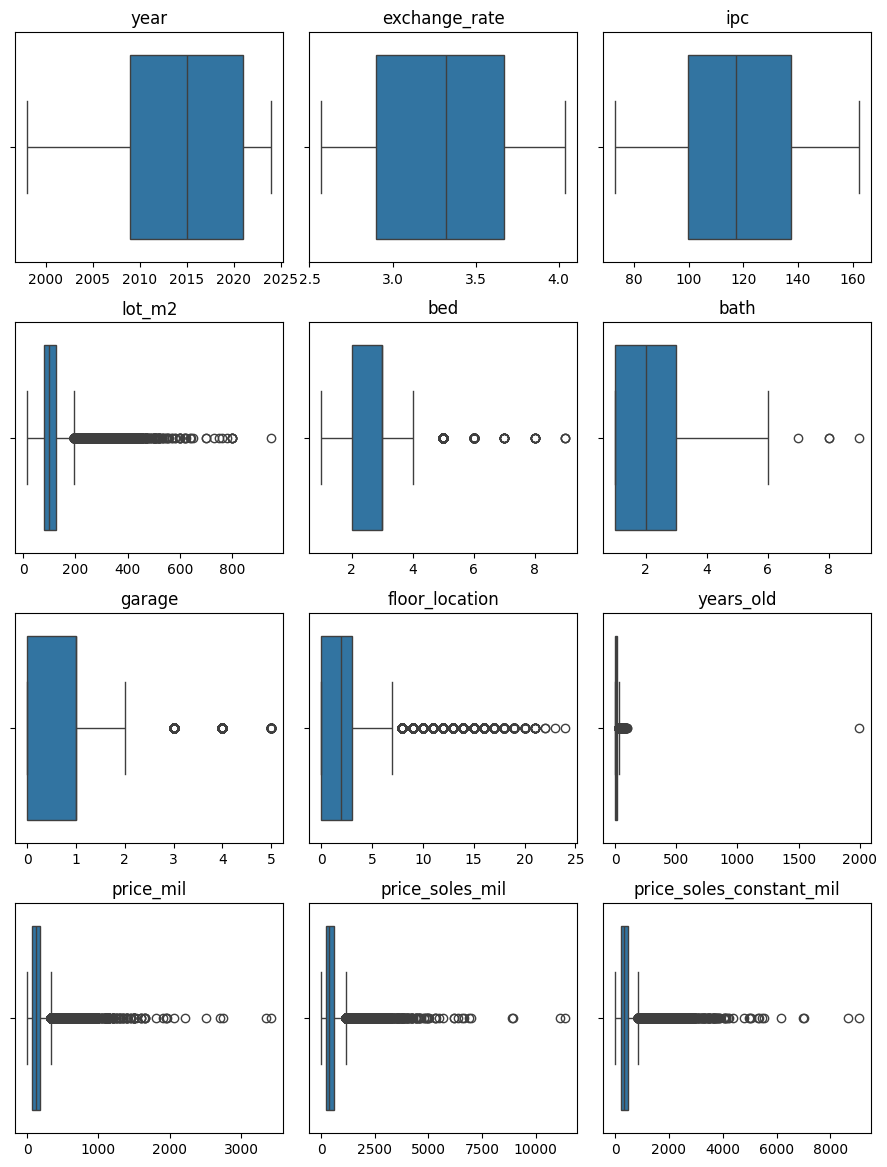

In [145]:
#Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_filtered = plot_numeric_boxplots(df_filtered)
graf_filtered

### Variable de precio

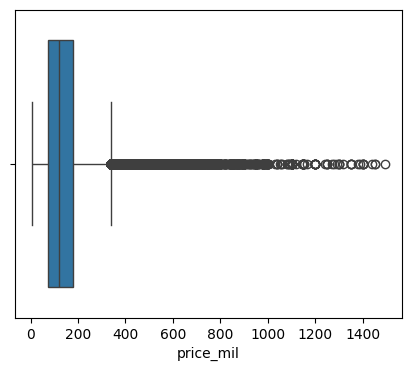

In [146]:
# Eliminando datos outliers para verificar el boxplot
variable = df_filtered["price_mil"].loc[(df_filtered["price_mil"] > 1) & (df_filtered["price_mil"] < 1500)]

# Realizando grafico de cajas
plt.figure(figsize=(5, 4))

sns.boxplot(x=variable)

plt.show()

In [147]:
#Eliminando filas con los valores outliers de la columna de precio
df_modified = df_filtered.loc[(df_filtered["price_mil"] > 1) & (df_filtered["price_mil"] < 1500)]

df_modified.shape

(87229, 15)

### Variable tamaño de casa

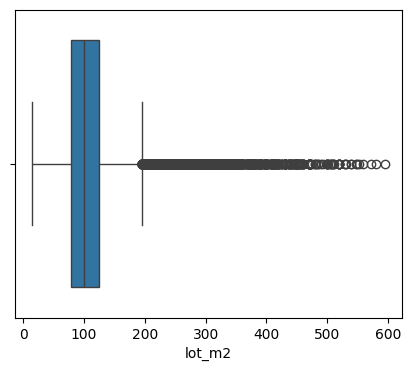

In [148]:
# Eliminando datos outliers para verificar el boxplot
variable = df_modified["lot_m2"].loc[(df_modified["lot_m2"] > 1) & (df_modified["lot_m2"] < 600)]

# Realizando grafico de cajas
plt.figure(figsize=(5, 4))

sns.boxplot(x=variable)

plt.show()

In [149]:
#Eliminando filas con los valores outliers de la columna de precio
df_modified = df_modified.loc[(df_modified["lot_m2"] > 1) & (df_modified["lot_m2"] < 600)]

df_modified.shape

(87210, 15)

### Variable de número de camas

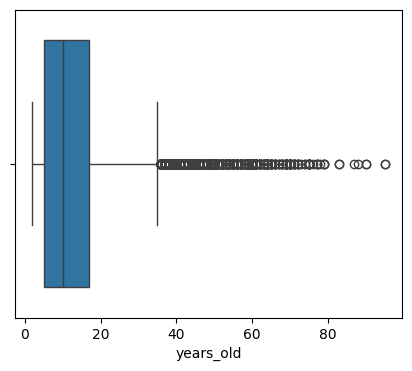

In [150]:
# Eliminando datos outliers para verificar el boxplot
variable = df_modified["years_old"].loc[(df_modified["years_old"] > 1) & (df_modified["years_old"] < 100)]

# Realizando grafico de cajas
plt.figure(figsize=(5, 4))

sns.boxplot(x=variable)

plt.show()

In [151]:
#Eliminando filas con los valores outliers de la columna de precio
df_modified = df_modified.loc[(df_modified["years_old"] > 1) & (df_modified["years_old"] < 100)]

df_modified.shape

(61188, 15)

### Valores atipicos finales

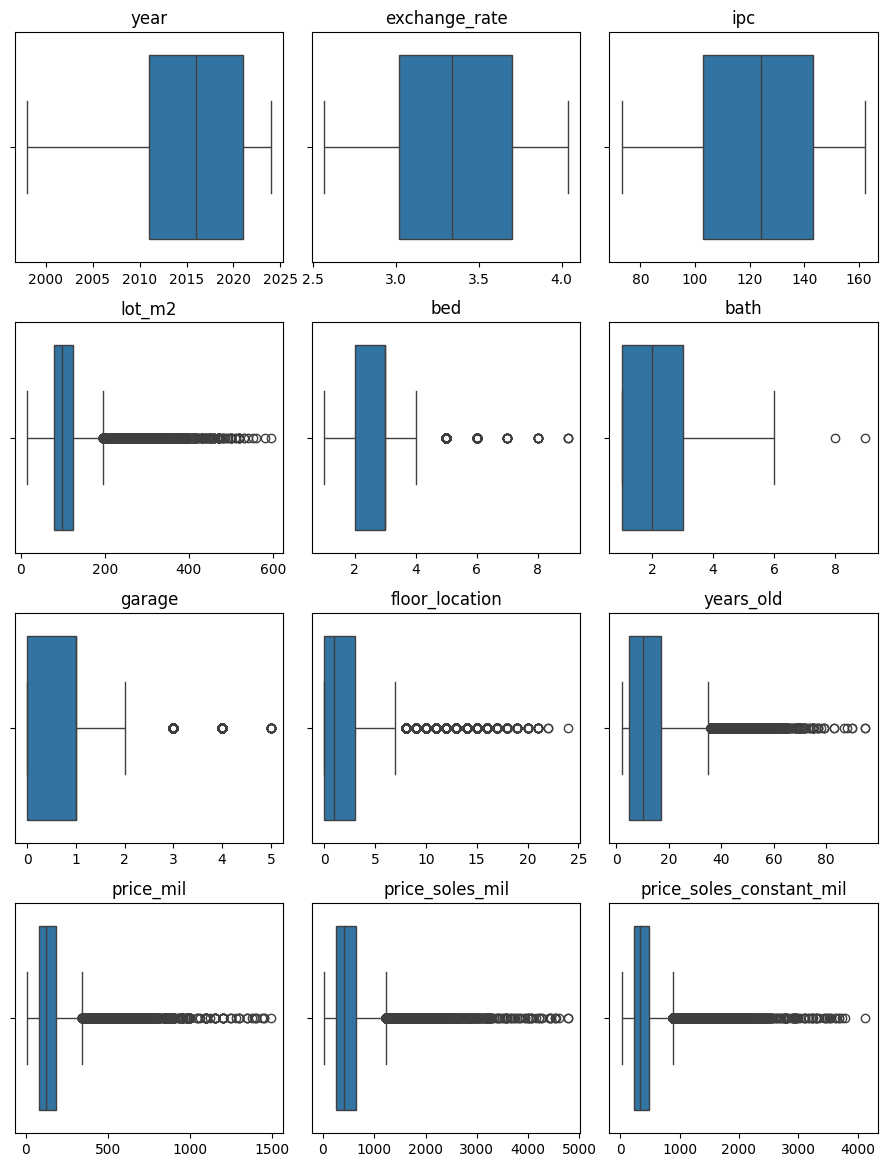

In [152]:
# Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_modified = plot_numeric_boxplots(df_modified)
graf_modified

## Calcular estadísticas de una variable numérica y otra categórica

In [155]:
# Utilizando describe para verificar las estadisticas de las variables numéricas
df_modified.describe().head(10)

,year,exchange_rate,ipc,lot_m2,bed,bath,garage,floor_location,years_old,price_mil,price_soles_mil,price_soles_constant_mil
count,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000,61188.000000
mean,2014.997712,3.335851,122.962577,109.344283,2.698438,2.060862,0.840034,2.253677,12.937684,150.111376,500.467418,401.372289
std,6.938838,0.404793,24.945986,48.872679,0.680008,0.835492,0.745526,2.938800,11.340498,110.507885,362.106569,282.055143
min,1998.000000,2.570000,73.130000,15.000000,1.000000,1.000000,0.000000,0.000000,2.000000,8.000000,25.934000,25.143000
25%,2011.000000,3.020000,103.090000,78.000000,2.000000,1.000000,0.000000,0.000000,5.000000,79.500000,255.241000,225.995000
50%,2016.000000,3.340000,124.100000,99.000000,3.000000,2.000000,1.000000,1.000000,10.000000,125.000000,417.625000,328.890000
75%,2021.000000,3.700000,143.100000,125.000000,3.000000,3.000000,1.000000,3.000000,17.000000,185.694000,641.372000,490.124000
max,2024.000000,4.040000,162.440000,595.000000,9.000000,9.000000,5.000000,24.000000,95.000000,1492.661000,4781.683000,4128.517000


In [156]:
# Creando lista de category_cols
category_cols = df_modified.select_dtypes(include=['object']).columns

# Iterando en cada columna categorica para determinar sus estadisticas
for col in category_cols:
    print(f"\nAnálisis de la columna categórica: '{col}'")

    # Calcular frecuencias y proporciones
    freq = df_modified[col].value_counts()
    prop = df_modified[col].value_counts(normalize=True)

    # Combinar frecuencias y proporciones en un DataFrame
    stats = pd.DataFrame({'Frecuencia': freq, 'Proporción': prop})
    stats['Proporción'] = stats['Proporción'].map('{:.2%}'.format)

    print(stats)


Análisis de la columna categórica: 'quarter'
         Frecuencia Proporción
quarter                       
4             15792     25.81%
3             15539     25.40%
1             15231     24.89%
2             14626     23.90%

Análisis de la columna categórica: 'state'
                 Frecuencia Proporción
state                                 
Miraflores             8853     14.47%
Surco                  8626     14.10%
San Borja              5729      9.36%
San Isidro             5695      9.31%
La Molina              4752      7.77%
San Miguel             3929      6.42%
Magdalena              3468      5.67%
Jesús María            2953      4.83%
Pueblo Libre           2560      4.18%
Lince                  2334      3.81%
Surquillo              2142      3.50%
Chorrillos             1927      3.15%
Cercado de Lima        1752      2.86%
Barranco               1628      2.66%
Los Olivos             1213      1.98%
Breña                  1134      1.85%
La Perla              

## Realizar el diagrama de barras de al menos una variable categórica

In [157]:
def plot_bar_chart(df, columny, columnx):

    # Calcular la mediana de los valores en 'columnx' agrupados por las categorías en 'columny'
    state_median = df.groupby(columny)[columnx].median().reset_index()

    # Ordenar los resultados por los valores en 'columnx'
    state_median_sorted = state_median.sort_values(by=columnx)

    # Crear una figura de tamaño 10x6 pulgadas
    plt.figure(figsize=(10, 6))

    # Generar el gráfico de barras horizontales
    bars = plt.barh(state_median_sorted[columny], state_median_sorted[columnx])

    # Añadir etiquetas de texto a las barras con los valores de la mediana
    for bar, price in zip(bars, state_median_sorted[columnx]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'  {price:,.0f}',
                 va='center', ha='left', fontsize=6)

    # Ajustar el tamaño de la fuente de las etiquetas en el eje y
    plt.yticks(fontsize=6)

    # Etiquetar el eje x
    plt.xlabel(f'Media del {columnx}')

    # Etiquetar el eje y
    plt.ylabel(f'{columny}')

    # Ajustar el diseño del gráfico para evitar solapamiento
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

    return bars


### Variable de precio

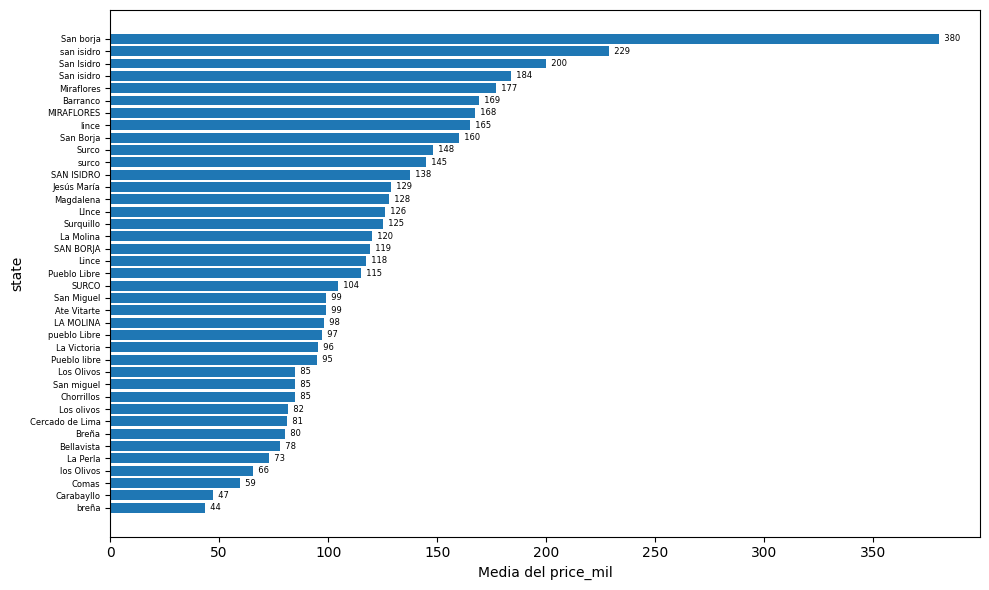

<BarContainer object of 39 artists>

In [158]:
# Creando grafico para la variable de "price_mil" como eje y la variable "state"
graf_price = plot_bar_chart(df_modified, 'state', 'price_mil')

# Imprimiendo el resultado
graf_price

### Variable de tamaño de casa

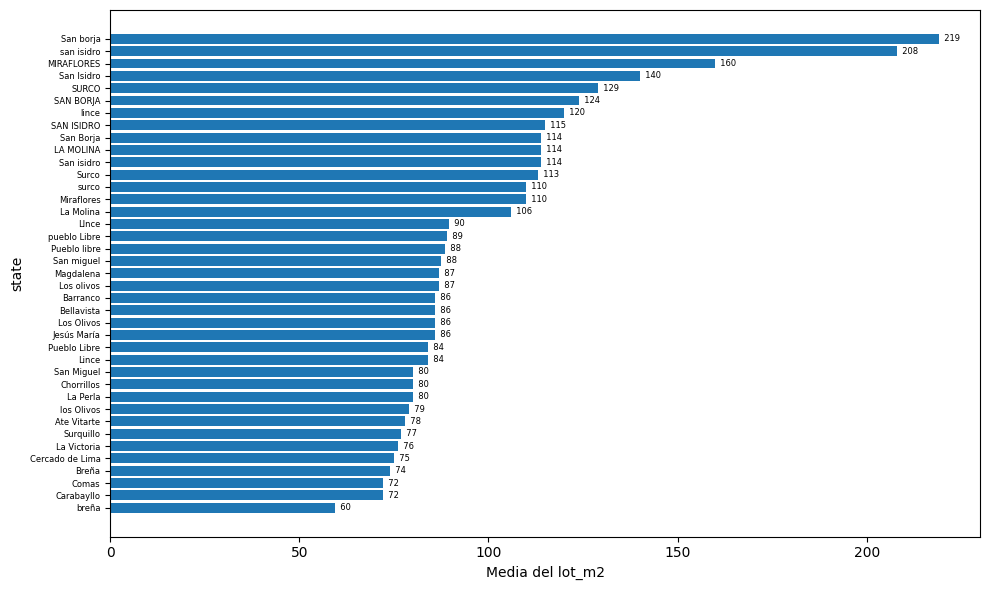

<BarContainer object of 39 artists>

In [159]:
# Creando grafico para la variable de "lot_m2" como eje y la variable "state"
graf_lot_m2 = plot_bar_chart(df_modified, 'state', 'lot_m2')

# Imprimiendo el resultado
graf_lot_m2

## Realizar el histograma de al menos una variable numérica

In [160]:
df_modified.select_dtypes(include=["float", "int"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 61188 entries, 0 to 96585
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      61188 non-null  int64  
 1   exchange_rate             61188 non-null  float64
 2   ipc                       61188 non-null  float64
 3   lot_m2                    61188 non-null  int64  
 4   bed                       61188 non-null  float64
 5   bath                      61188 non-null  float64
 6   garage                    61188 non-null  float64
 7   floor_location            61188 non-null  float64
 8   years_old                 61188 non-null  float64
 9   price_mil                 61188 non-null  float64
 10  price_soles_mil           61188 non-null  float64
 11  price_soles_constant_mil  61188 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 6.1 MB


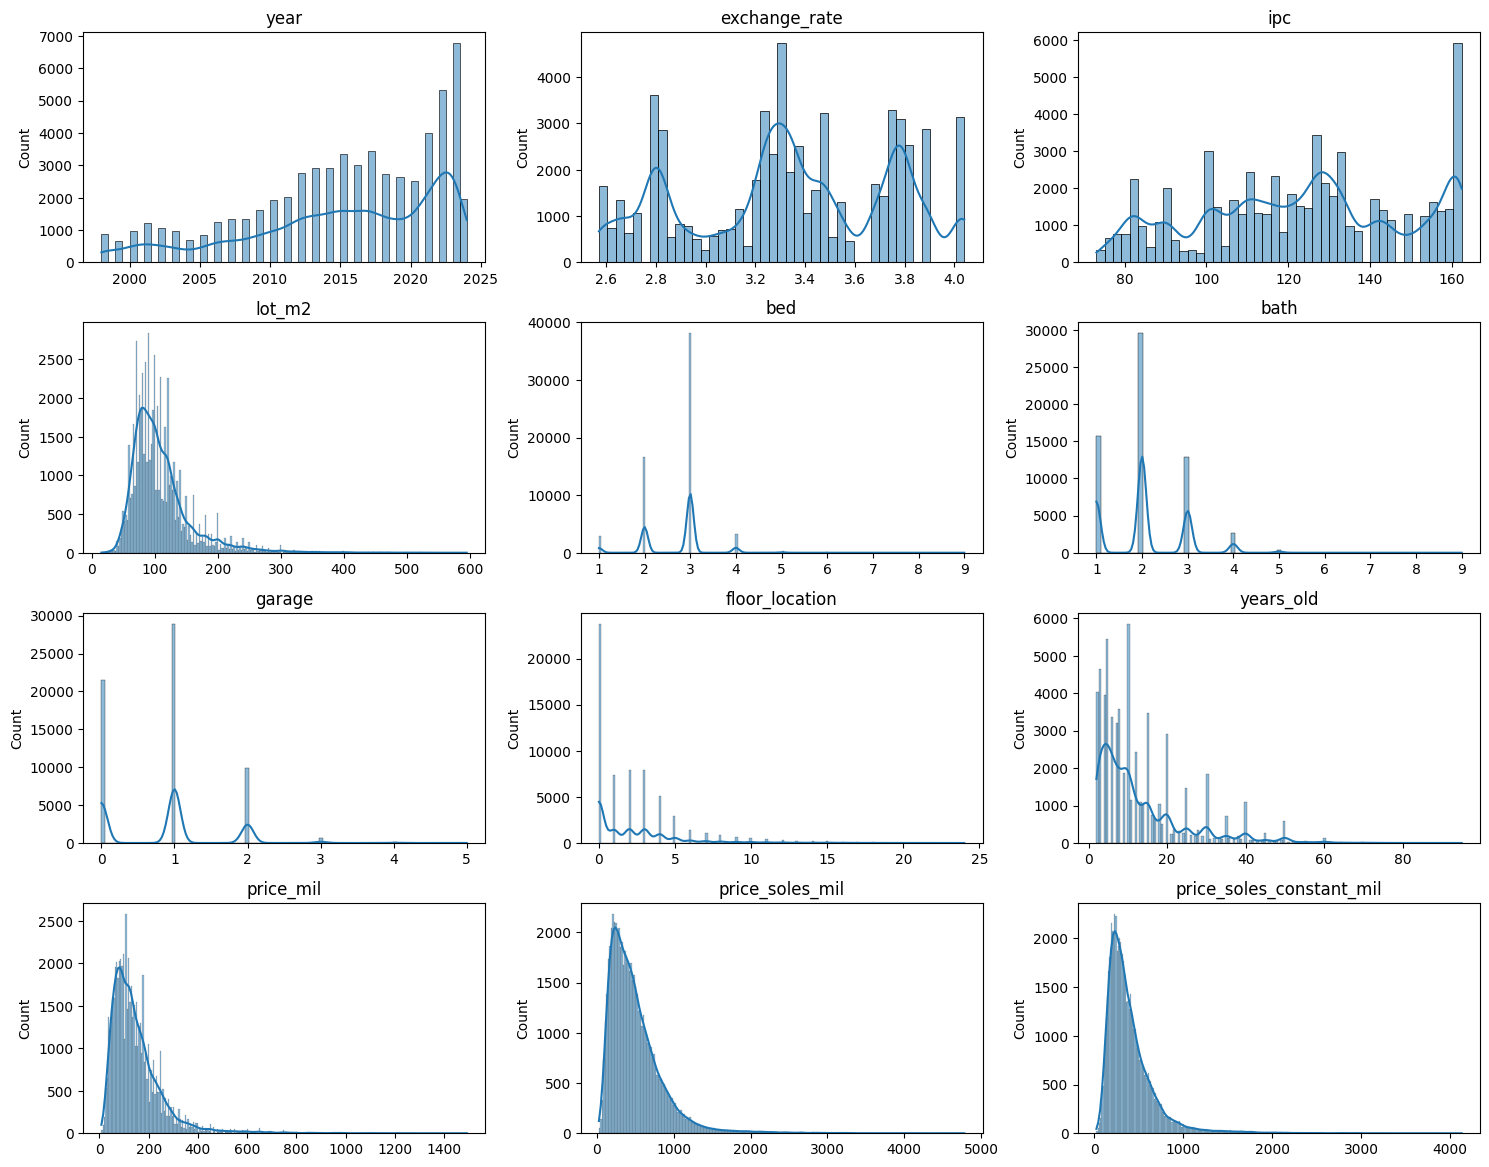

In [161]:
# Seleccionar columnas numéricas
numeric_columns = df_modified.select_dtypes(include=["float", "int"]).columns

# Calcular el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas por fila
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre las columnas numéricas
for i, column in enumerate(numeric_columns):
    # Gráfico de caja
    sns.histplot(x=df_modified[column], ax=axes[i] , kde=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

# Ocultar subplots vacíos si los hay
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Generar diagramas de dispersión

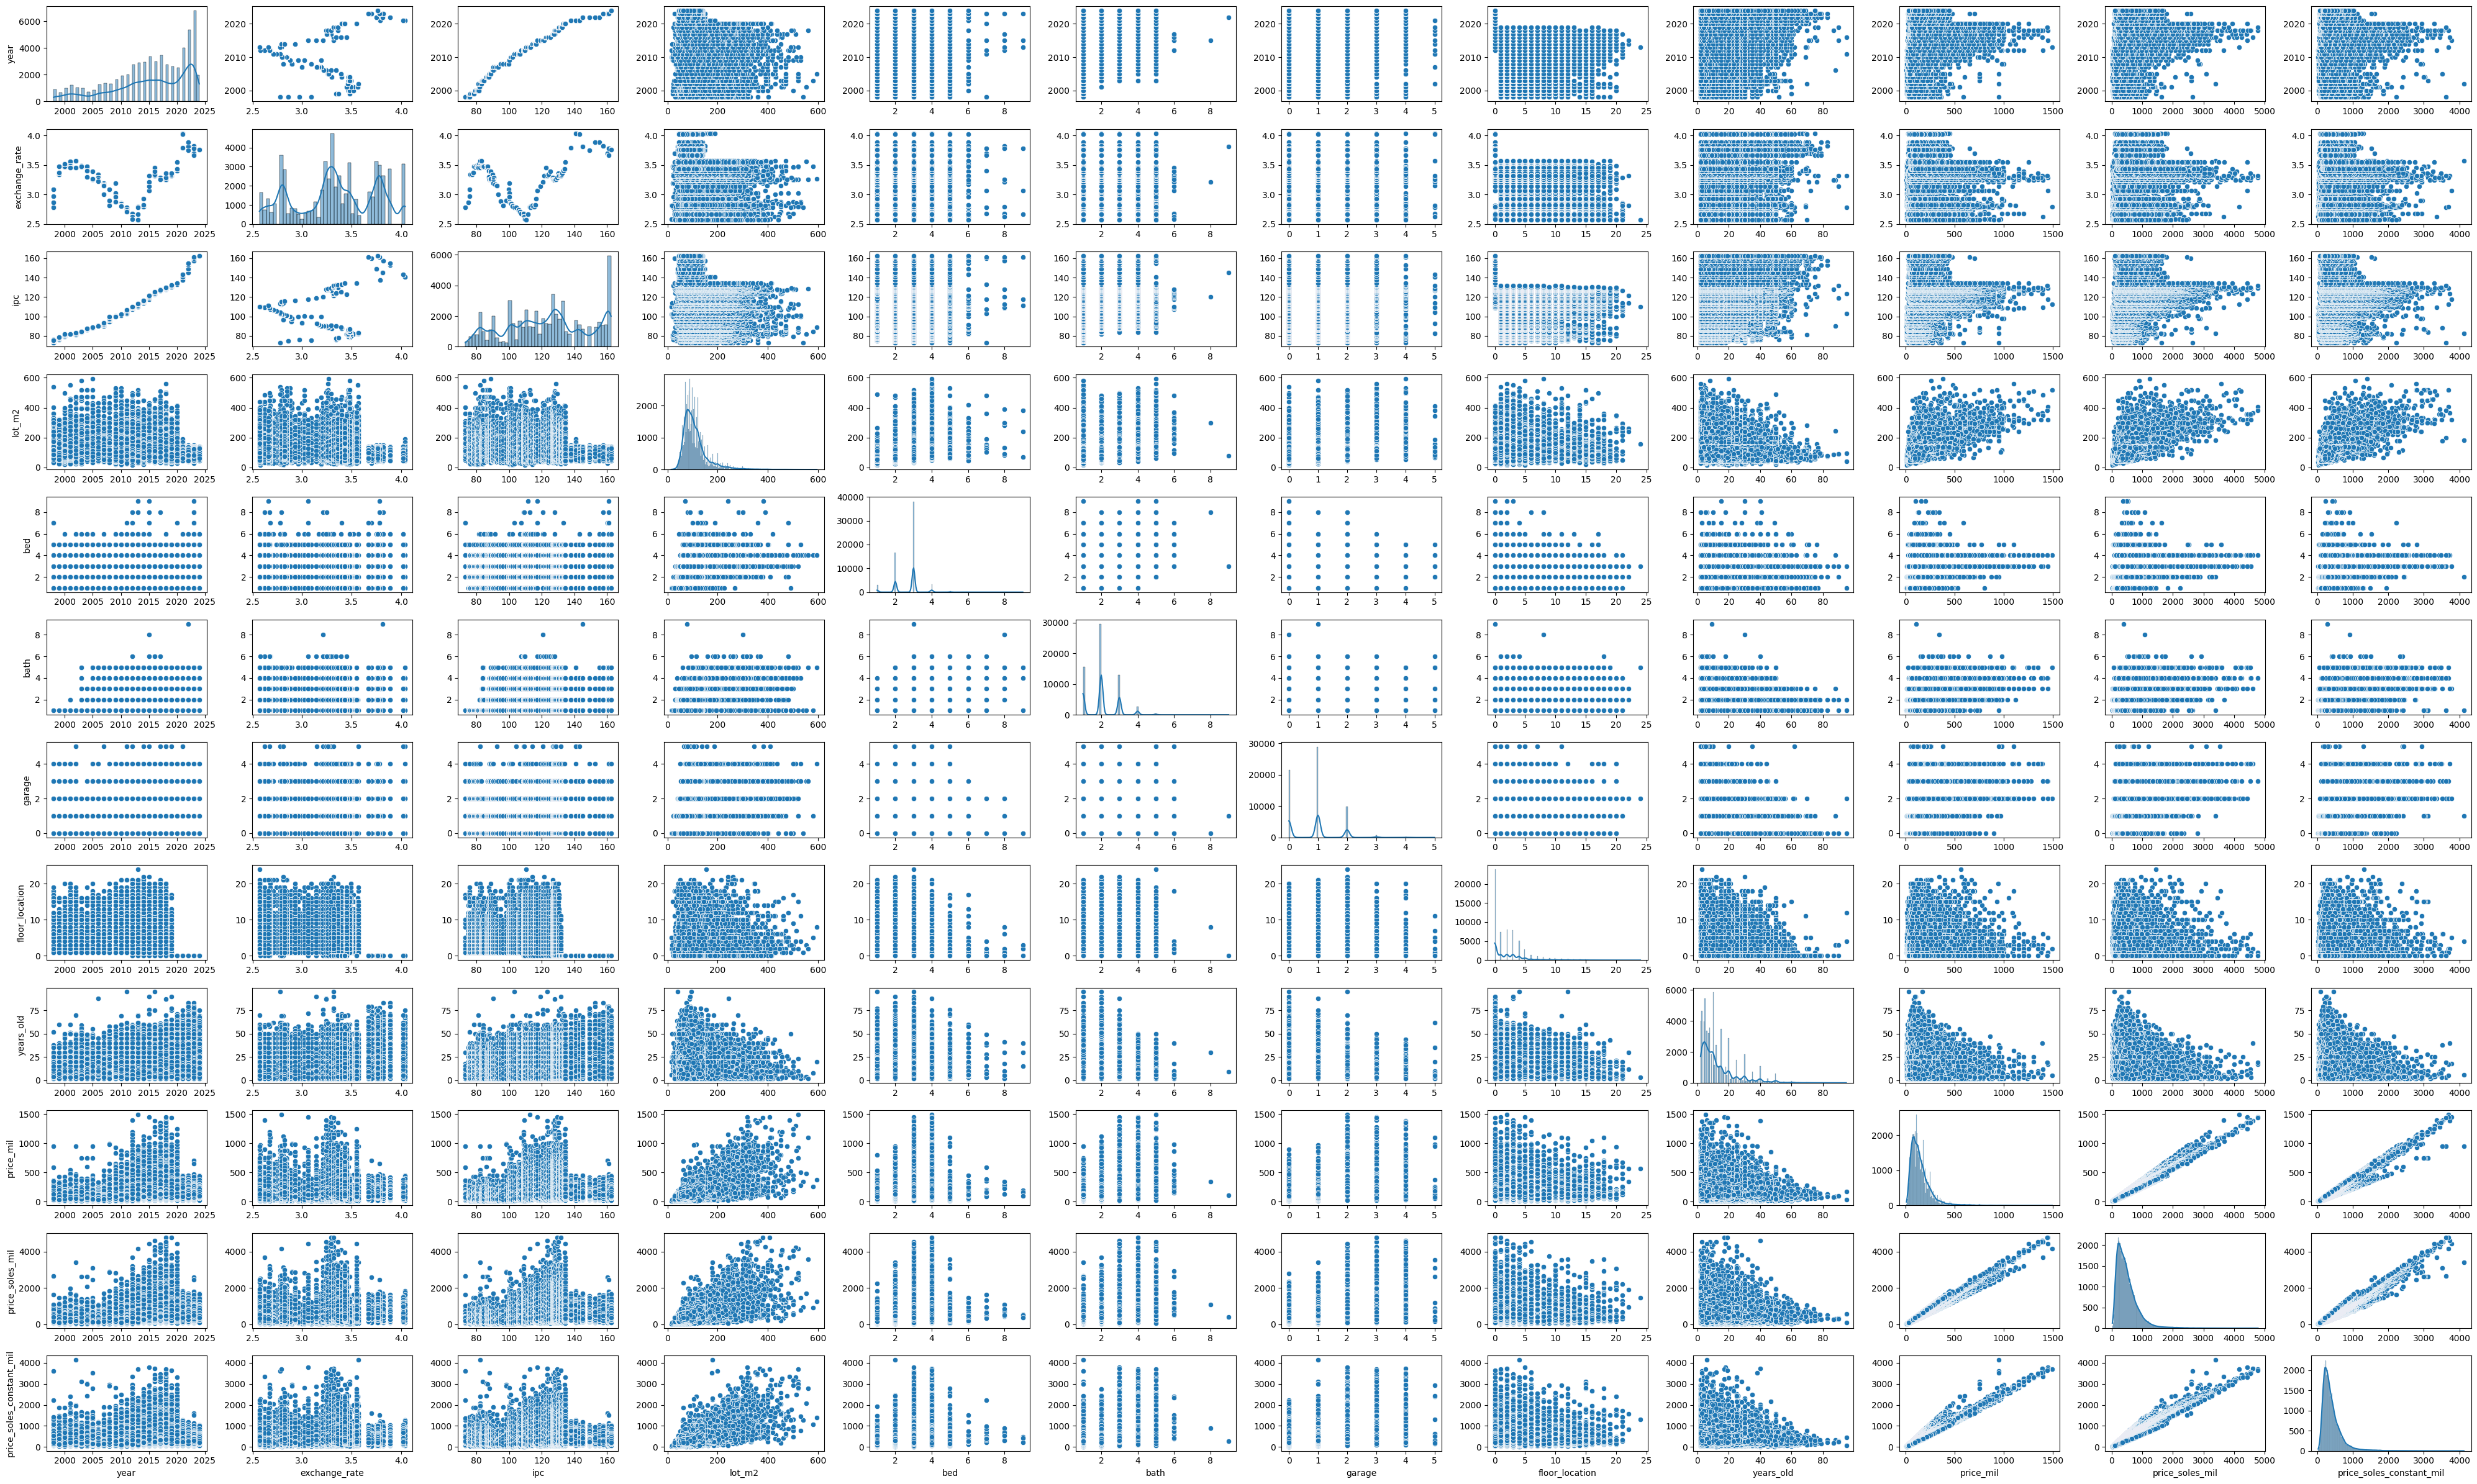

In [162]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_modified.select_dtypes(include=["float64", "int"]).columns

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=len(numeric_columns), figsize=(40, 24))

# Iterar sobre todas las combinaciones de columnas numéricas
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]

        if i != j:
            # Crear diagrama de dispersión
            sns.scatterplot(data=df_modified, x=col2, y=col1, ax=ax)
        else:
            # Crear histograma en la diagonal
            sns.histplot(data=df_modified, x=col1, ax=ax, kde=True)

        # Ajustar etiquetas
        if i == len(numeric_columns) - 1:
            ax.set_xlabel(col2)
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(col1)
        else:
            ax.set_ylabel('')

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Realizar correlación entre variables

In [163]:
def analyze_correlation(df, method='pearson', figsize=(12, 8)):
    # Seleccionar solo las columnas numéricas
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    corr_matrix = numeric_df.corr(method=method)

    # Crear la figura
    plt.figure(figsize=figsize)

    # Crear el mapa de calor
    fig = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    # Configurar el título
    plt.title(f'Matriz de Correlación {method.capitalize()}', fontsize=16)

    # Mostrar el gráfico
    plt.show()

    return fig

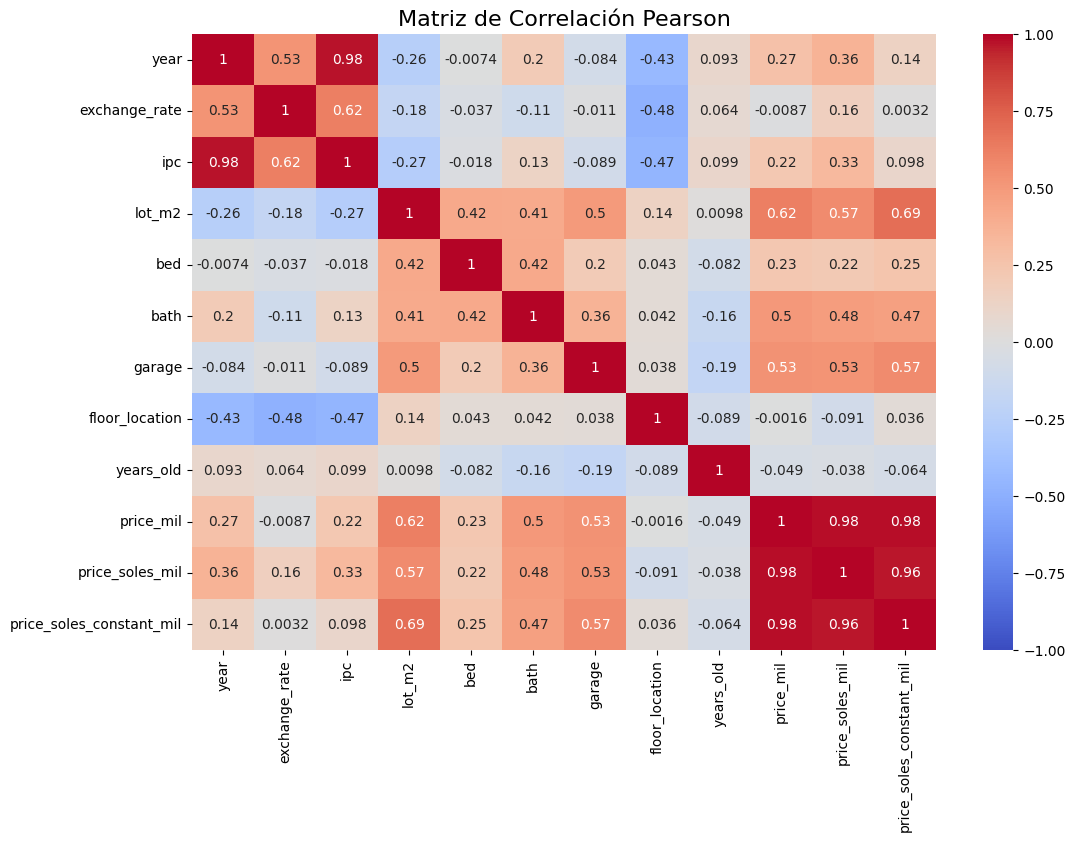

<Axes: title={'center': 'Matriz de Correlación Pearson'}>

In [164]:
analyze_correlation(df_modified)

## Mapear columnas categoricas

In [166]:
# Identificando las columnas tipo categoricas
df_modified.select_dtypes(include=['object']).columns

Index(['quarter', 'state', 'exterior_view'], dtype='object')

In [167]:
df_mapped = df_modified.copy()
mapping_dict = {}

# Seleccionar las columnas categóricas
columns_to_map = df_mapped.select_dtypes(include=['object']).columns

for column in columns_to_map:
    if df_modified[column].dtype == 'object':
        # Usar LabelEncoder para mapear los valores
        le = LabelEncoder()
        df_mapped[column] = le.fit_transform(df_modified[column].astype(str))

        # Guardar el mapeo realizado a las columnas categoricas
        mapping_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

        print(f"Columna '{column}' mapeada.")
        print(f"Mapeo: {mapping_dict[column]}\n")

Columna 'quarter' mapeada.
Mapeo: {'1': 0, '2': 1, '3': 2, '4': 3}

Columna 'state' mapeada.
Mapeo: {'Ate Vitarte': 0, 'Barranco': 1, 'Bellavista': 2, 'Breña': 3, 'Carabayllo': 4, 'Cercado de Lima': 5, 'Chorrillos': 6, 'Comas': 7, 'Jesús María': 8, 'LA MOLINA': 9, 'LInce': 10, 'La Molina': 11, 'La Perla': 12, 'La Victoria': 13, 'Lince': 14, 'Los Olivos': 15, 'Los olivos': 16, 'MIRAFLORES': 17, 'Magdalena': 18, 'Miraflores': 19, 'Pueblo Libre': 20, 'Pueblo libre': 21, 'SAN BORJA': 22, 'SAN ISIDRO': 23, 'SURCO': 24, 'San Borja': 25, 'San Isidro': 26, 'San Miguel': 27, 'San borja': 28, 'San isidro': 29, 'San miguel': 30, 'Surco': 31, 'Surquillo': 32, 'breña': 33, 'lince': 34, 'los Olivos': 35, 'pueblo Libre': 36, 'san isidro': 37, 'surco': 38}

Columna 'exterior_view' mapeada.
Mapeo: {'0': 0, '1': 1}



## Identificar la variable target y verificar el balance entre clase

In [ ]:
target_var = 'price_mil'

print("Balance de clases:")

df_modified[target_var].value_counts(normalize=True)

Balance de clases:


price_mil
450.00    0.010647
425.00    0.010152
350.00    0.009924
399.90    0.009028
650.00    0.008914
            ...   
677.75    0.000019
509.97    0.000019
517.30    0.000019
461.30    0.000019
724.99    0.000019
Name: proportion, Length: 3669, dtype: float64